In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
dataset = pd.read_excel("SMS spam dataset.xlsx")
dataset.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3
0,Not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,Not spam,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,Not spam,U dun say so early hor... U c already then say...,NaN,NaN
4,Not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [141]:
dataset.drop(columns=["Unnamed: 2" , "Unnamed: 3" ] , inplace = True)

In [142]:
dataset.head(5)

,v1,v2
0,Not spam,"Go until jurong point, crazy.. Available only ..."
1,Not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not spam,U dun say so early hor... U c already then say...
4,Not spam,"Nah I don't think he goes to usf, he lives aro..."


In [143]:
dataset.rename(columns={ 'v1':'Target' , 'v2':'Text' },inplace=True)
dataset.head(5)

,Target,Text
0,Not spam,"Go until jurong point, crazy.. Available only ..."
1,Not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not spam,U dun say so early hor... U c already then say...
4,Not spam,"Nah I don't think he goes to usf, he lives aro..."


In [144]:
dataset.shape

(5572, 2)

In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [146]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [147]:
dataset["Target"] = encoder.fit_transform(dataset["Target"])

In [148]:
dataset.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [149]:
# 1 - spam
# 0 - not spam

In [150]:
dataset.isnull().sum()

Target    0
Text      0
dtype: int64

In [151]:
dataset.duplicated().sum()

403

In [152]:
dataset.drop_duplicates(inplace=True)

In [153]:
dataset.shape

(5169, 2)

In [154]:
dataset.duplicated().sum()

0

In [155]:
dataset["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

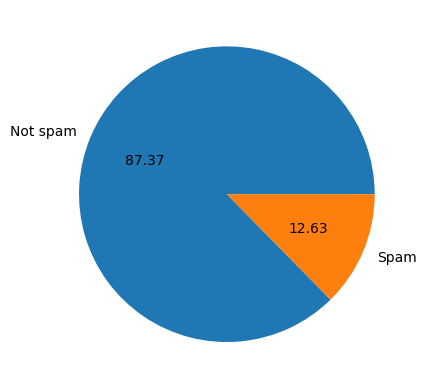

In [156]:
plt.pie( dataset["Target"].value_counts() , labels = ["Not spam","Spam"] , autopct=  "%0.2f")
plt.show()

#data is imbalanced

In [157]:
#lets see how many alphabets , lettters , and words are used in a message or sms

In [158]:
import nltk

In [159]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shabi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int32 
 1   Text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [161]:
#number  of characters

In [162]:
dataset['num_characters'] = dataset['Text'].astype(str).apply(len)


In [163]:
dataset

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [164]:
#number of words

In [165]:
dataset["Text"].astype("str").apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [166]:
dataset["Text"].astype("str").apply(lambda x : len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [167]:
dataset["num_words"] = dataset["Text"].astype("str").apply(lambda x : len(nltk.word_tokenize(x)))

In [168]:
dataset

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [169]:
#number of sentenses

In [170]:
dataset["Text"].astype("str").apply(lambda x : nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [171]:
dataset["Text"].astype("str").apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [172]:
dataset["num_sentenses"] = dataset["Text"].astype("str").apply(lambda x : len(nltk.sent_tokenize(x)))

In [173]:
dataset

,Target,Text,num_characters,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [174]:
dataset.describe()

,Target,num_characters,num_words,num_sentenses
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.980267,18.455794,1.965564
std,0.332253,58.239404,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [175]:
dataset.corr(numeric_only=True)["Target"]

Target            1.000000
num_characters    0.384681
num_words         0.262912
num_sentenses     0.263939
Name: Target, dtype: float64

In [176]:
dataset[dataset["Target"] == 0 ].describe()

,Target,num_characters,num_words,num_sentenses
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.461913,17.123782,1.820195
std,0.0,56.362288,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [177]:
#not spam
dataset[dataset["Target"] == 0 ][["num_characters" , "num_words" , "num_sentenses"]].describe()

,num_characters,num_words,num_sentenses
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123782,1.820195
std,56.362288,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [178]:
#spam
dataset[dataset["Target"] == 1 ][["num_characters" , "num_words" , "num_sentenses"]].describe()

,num_characters,num_words,num_sentenses
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


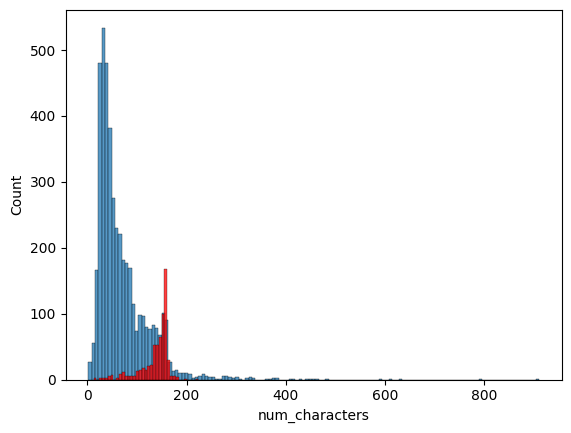

In [179]:

sns.histplot(dataset[dataset["Target"] == 0]["num_characters"]) #not spam
sns.histplot(dataset[dataset["Target"] == 1]["num_characters"] , color= "red") #spam
plt.show()

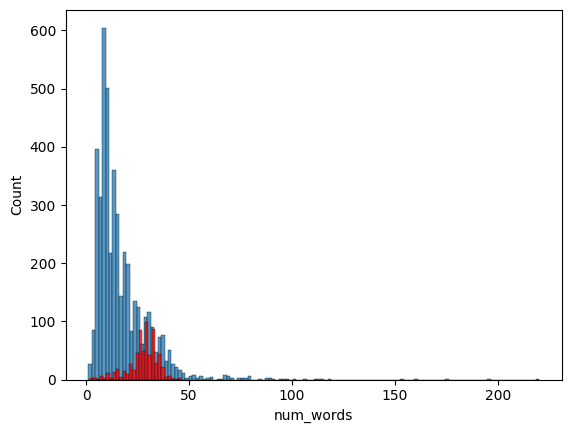

In [180]:
sns.histplot(dataset[dataset["Target"] == 0]["num_words"]) #not spam
sns.histplot(dataset[dataset["Target"] == 1]["num_words"] , color= "red") #spam
plt.show()

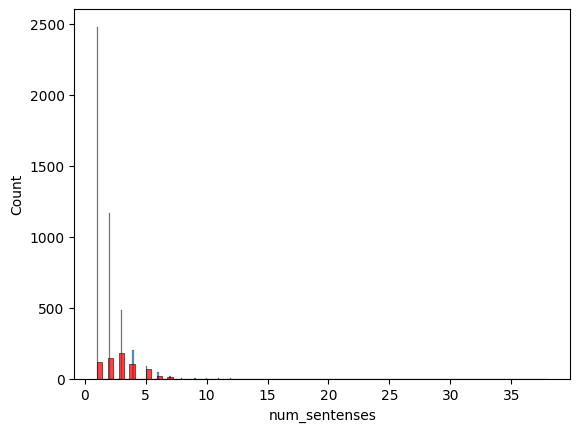

In [181]:
sns.histplot(dataset[dataset["Target"] == 0]["num_sentenses"]) #not spam
sns.histplot(dataset[dataset["Target"] == 1]["num_sentenses"] , color= "red") #spam
plt.show()

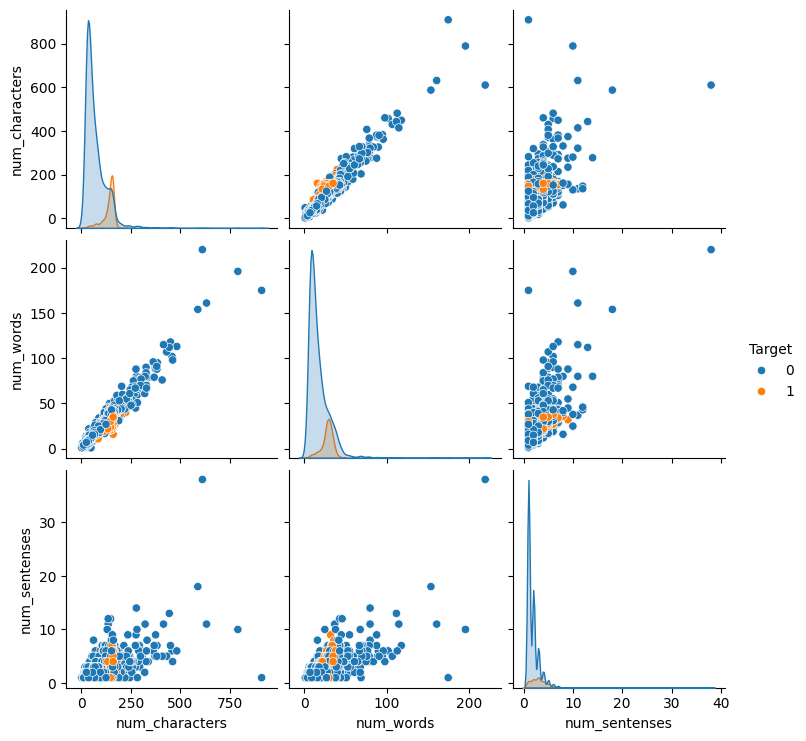

In [182]:
sns.pairplot(dataset , hue = "Target")

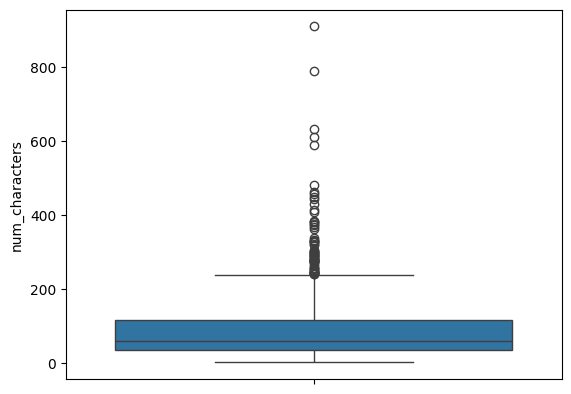

In [183]:
sns.boxplot(dataset["num_characters"])
plt.show()

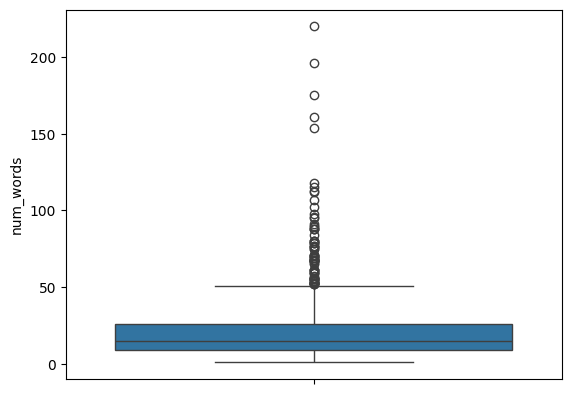

In [184]:
sns.boxplot(dataset["num_words"])
plt.show()

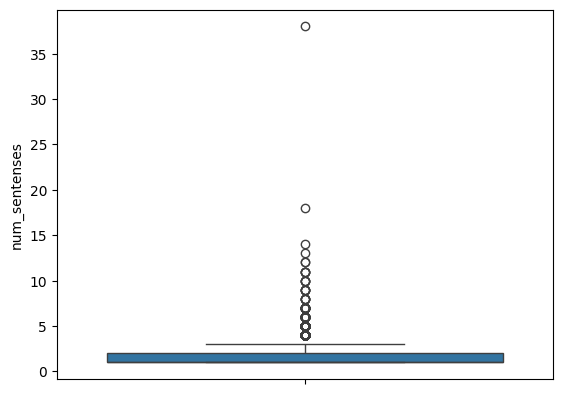

In [185]:
sns.boxplot(dataset["num_sentenses"])
plt.show()

In [186]:
dataset.corr(numeric_only= True)

,Target,num_characters,num_words,num_sentenses
Target,1.000000,0.384681,0.262912,0.263939
num_characters,0.384681,1.000000,0.965775,0.624148
num_words,0.262912,0.965775,1.000000,0.679971
num_sentenses,0.263939,0.624148,0.679971,1.000000


<Axes: >

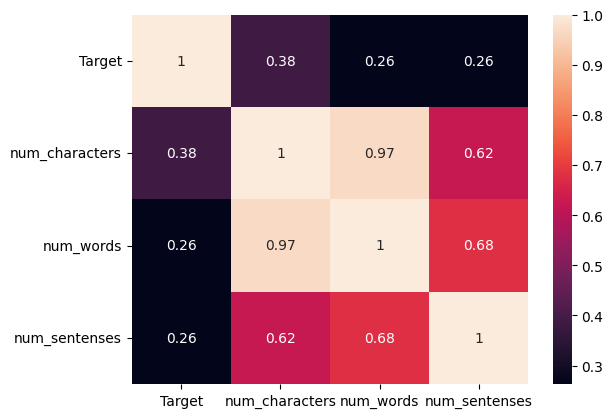

In [187]:
sns.heatmap(dataset.corr(numeric_only= True) , annot= True)

lets do some data preprocessing that is needed for natural language processing
1)lower case
2)tokenization
3)removing special characters
4)removal of stop words and punctuations
5)stemming

In [188]:
dataset["Text"] = dataset["Text"].astype("str")

In [189]:
dataset

,Target,Text,num_characters,num_words,num_sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [190]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shabi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [191]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [192]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [193]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [194]:
ps.stem("ran")

'ran'

In [195]:
def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y.copy()
    y.clear() 

    for i in text :
        y.append(ps.stem(i))
    
    return " ".join(y)            #return as a string
    



In [196]:
transform_text("Hi how are you Shabi ?")

'hi shabi'

In [197]:
dataset["Text"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [198]:
dataset["Transformed_text"] = dataset["Text"].apply(transform_text)

In [199]:
dataset

,Target,Text,num_characters,num_words,num_sentenses,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [200]:
#word cloud for spam

from wordcloud import WordCloud
wc = WordCloud (width = 1000 , height=1000 , min_font_size=10 , background_color="white")

In [201]:
wc.generate(dataset[dataset["Target"] == 1]["Transformed_text"].str.cat(sep=" "))

In [202]:
spam_wc = wc.generate(dataset[dataset["Target"] == 1]["Transformed_text"].str.cat(sep=" "))

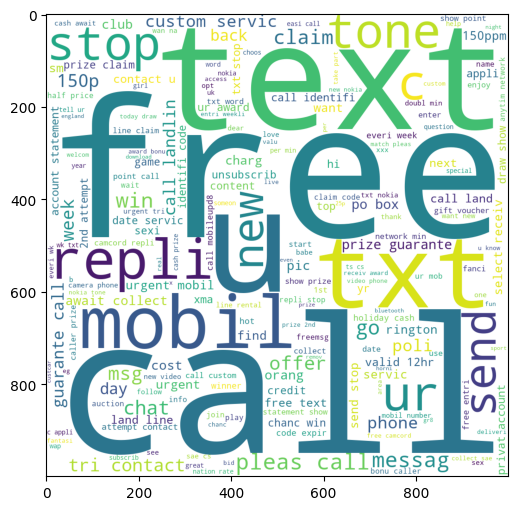

In [203]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [204]:
#word cloud for not spam

from wordcloud import WordCloud
wc = WordCloud (width = 1000 , height=1000 , min_font_size=10 , background_color="white")

In [205]:
wc.generate(dataset[dataset["Target"] == 0]["Transformed_text"].str.cat(sep=" "))

In [206]:
not_spam_wc = wc.generate(dataset[dataset["Target"] == 0]["Transformed_text"].str.cat(sep=" "))

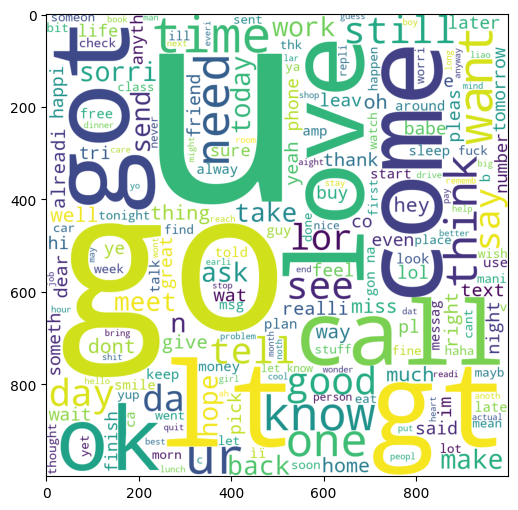

In [207]:
plt.figure(figsize=(12,6))
plt.imshow(not_spam_wc)

In [208]:
#lets see top 30 words in spam 

In [209]:
dataset[dataset["Target"] == 1]["Transformed_text"]

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_text, Length: 653, dtype: object

In [210]:
dataset[dataset["Target"] == 1]["Transformed_text"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [211]:
list_spam = dataset[dataset["Target"] == 1]["Transformed_text"].tolist()

In [212]:
spam_corpus = []
for msg in list_spam:
    #print(msg)
    for word in msg.split():
        spam_corpus.append(word)
    

In [213]:
len(spam_corpus)

9939

In [214]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [215]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [216]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


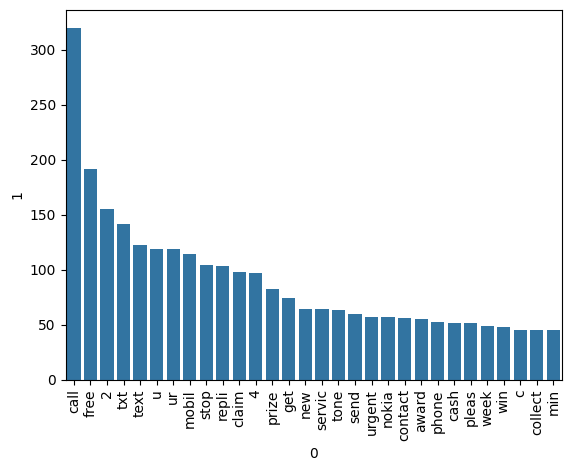

In [217]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [218]:
#lets see top 30 words in not-spam

In [219]:
dataset[dataset["Target"] == 0]["Transformed_text"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Transformed_text, Length: 4516, dtype: object

In [220]:
dataset[dataset["Target"] == 0]["Transformed_text"].tolist()

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [221]:
list_not_spam = dataset[dataset["Target"] == 0]["Transformed_text"].tolist()

In [222]:
not_spam_corpus = []
for msg in list_not_spam:
    #print(msg)
    for word in msg.split():
        not_spam_corpus.append(word)

In [223]:
len(not_spam_corpus)

35402

In [224]:
Counter(not_spam_corpus)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [225]:
Counter(not_spam_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [226]:
pd.DataFrame(Counter(not_spam_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


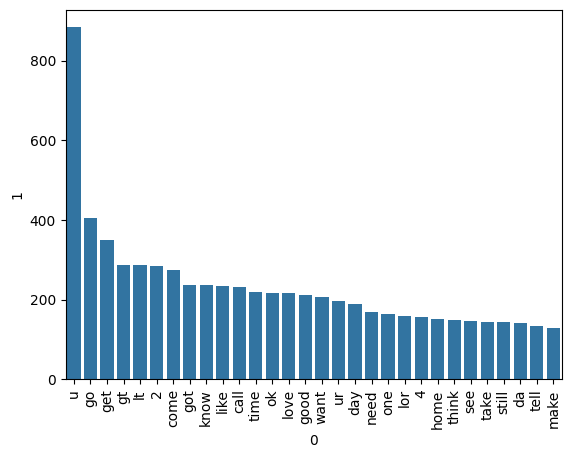

In [227]:
sns.barplot(x = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0], y =pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [228]:
#lets build a model using naive bayes , sinice naive bayes works well on textual model. Apart from nb will alos use other algorithms

In [229]:
#now lets converrt the Text to vectors , since ml works on numbers and not on textual data

In [230]:
#there are few methods like
# bag of words - makes a column of frequent words and then check how many times does that word appers in each sms
#tfidf
#word to word

In [231]:
from sklearn.feature_extraction.text import TfidfVectorizer        #tfidf
tfidf = TfidfVectorizer(max_features = 3000)

In [232]:
x = tfidf.fit_transform(dataset["Transformed_text"]).toarray()

In [233]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [234]:
x.shape

(5169, 3000)

In [235]:
#will not use standard scaler since it aalso gives us -ve values which the naive bayes algorithm does not accept

In [236]:
#from sklearn.preprocessing import MinMaxScaler
#scalar = MinMaxScaler()
#x = scaler.fit_transform(x)
#it does not imporve the pperformance , the precision goes down

In [237]:
#appendind the num_CHARACters to x
#x = np.hstack (x , dataset["num_characters"].values.reshape(-1,1))

In [238]:
x.shape

(5169, 3000)

In [239]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [240]:
y = dataset["Target"].values

In [241]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [242]:
y.shape

(5169,)

In [243]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [244]:
from sklearn.metrics import confusion_matrix , precision_score , accuracy_score

In [245]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size= 0.2 , random_state=2)

In [246]:
gnb.fit(x_train , y_train)
y_predict_1 = gnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_1))
print("\n PRECISION :" , precision_score(y_test , y_predict_1))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_1))

ACCURACY : 0.8723404255319149

 PRECISION : 0.5137614678899083

 CONFUSION MATRIX :
 [[790 106]
 [ 26 112]]


In [247]:
mnb.fit(x_train , y_train)
y_predict_2 = mnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_2))
print("\n PRECISION :" , precision_score(y_test , y_predict_2))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_2))

ACCURACY : 0.971953578336557

 PRECISION : 1.0

 CONFUSION MATRIX :
 [[896   0]
 [ 29 109]]


In [248]:
bnb.fit(x_train , y_train)
y_predict_3 = bnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_3))
print("\n PRECISION :" , precision_score(y_test , y_predict_3))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_3))

ACCURACY : 0.9825918762088974

 PRECISION : 0.9918032786885246

 CONFUSION MATRIX :
 [[895   1]
 [ 17 121]]


In [249]:
# we choose tfidf with mnb , precision mattters alot , accuracy does not matter that much since we have an imbalanced dataset

In [250]:
#now lets get some more ml algoriths and compare them with the mulyimonial algorithm

In [251]:
#lets take a trial input , tocheck the working of the function

In [252]:
#train_classifier(svc,x_train,y_train,x_test,y_test)
#(0.9748549323017408, 0.9745762711864406)

In [253]:
#performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [254]:
#performance_df

In [255]:
#performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [256]:
#performance_df1

In [257]:
#sns.catplot (x = "Algorithm" , y = "value" , hue= "variable" , data = performance_df1 , kind="bar" , height = 5)

In [258]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [259]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [260]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [261]:
#new_df = performance_df.merge(temp_df,on='Algorithm')

In [262]:
#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [263]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [264]:
#new_df_scaled.merge(temp_df,on='Algorithm')

In [266]:
import pickle
pickle.dump(tfidf,open('vectorizer_tfidf_using_sms2.pkl','wb'))
pickle.dump(mnb,open('model_mnb_sms2.pkl','wb'))